#Solve :
A life insurance salesman sells on the avarage 3 life insurance plolices per week.Use piosson law to calculate the probability:
a. In a given week, he will sell some policies.
b. In a given week, he will sell 2 or more policies but more than five policies .
c. Assuming that per week ,there are 5 working days ,what is the probability that on a day, he will sell one policy?

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import binom
from scipy.stats import poisson

In [25]:
#A)In a given week, he will sell some policies.
Lambda_week = 3
p_some = 1 - poisson.pmf(0,Lambda_week)
print(f"probability of he sell some policies:{p_some}")

probability of he sell some policies:0.950212931632136


In [21]:
#B)In a given week, he will sell 2 or more policies but more than five policies 
p_2_5  = [2,3,4]
print(poisson.pmf(p_2_5,Lambda_week).sum())
p_1 = poisson.cdf(1,Lambda_week) 
p_2_5 = poisson.cdf(4,Lambda_week) - p_1
p_2_5

0.6161149710523164


0.6161149710523164

In [24]:
#c) Assuming that per week ,there are 5 working days ,what is the probability that on a day, he will sell one policy?

Lamda_day = 3/5

poisson.pmf(1,Lamda_day)



0.3292869816564159

In [26]:
#D what is the probability he will sell 3 policies in the next week

poisson.pmf(3,Lambda_week)

0.22404180765538775

Assignment Poisson Hospital Dataset  

In [40]:
df = pd.read_csv('../dataset/hospital_visits.csv')
df.head(3)

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN


In [41]:
df['START'] = pd.to_datetime(df['START'])
df['STOP'] = pd.to_datetime(df['STOP'])

In [45]:
df['DURATION'] = (df['STOP'] - df['START']).dt.total_seconds() / 3600
avg_duration = df['DURATION'].mean()
avg_duration

7.265994695620651

In [48]:
k = range(int(avg_duration)-5,int(avg_duration)+6)

probabilities = poisson.pmf(k,avg_duration)


In [51]:
#print probabilities 
print('Poisson probabilites for each k:')
for duration,prob in zip(k,probabilities):
    print(f"{duration} hours ,probability : {prob :.4f}")


Poisson probabilites for each k:
2 hours ,probability : 0.0184
3 hours ,probability : 0.0447
4 hours ,probability : 0.0812
5 hours ,probability : 0.1180
6 hours ,probability : 0.1428
7 hours ,probability : 0.1483
8 hours ,probability : 0.1347
9 hours ,probability : 0.1087
10 hours ,probability : 0.0790
11 hours ,probability : 0.0522
12 hours ,probability : 0.0316


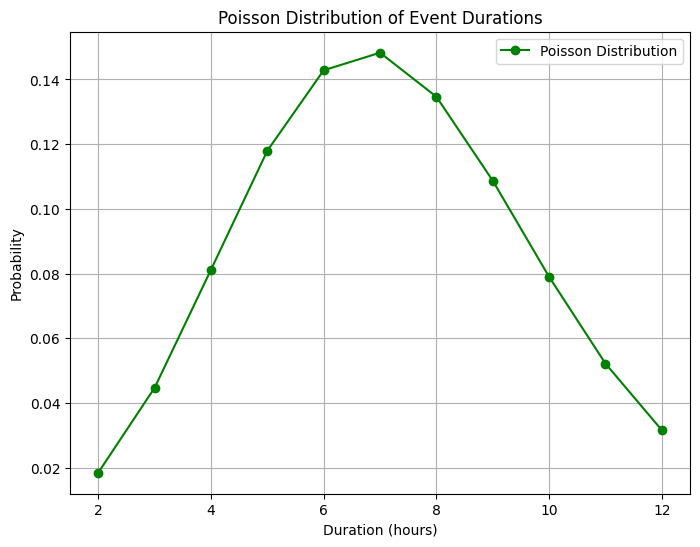

In [52]:
#plot poisson distributaion

plt.figure(figsize=(8,6))
plt.plot(k,probabilities,label='Poisson Distribution',marker='o',color='Green')
plt.xlabel('Duration (hours)')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Event Durations')
plt.legend()
plt.grid(True)
plt.show()

Assingment: For the retail_data_transactions.csv dataset find the average find the average number of daily transactions,
Estimate and plot the probabilities of average +/- 10 transactions.use posssion distribution

In [59]:
retail_df = pd.read_csv('../dataset/Retail_Data_Transactions.csv')
retail_df.head(2)
retail_df['customer_id'].count()


6889

In [62]:
grouped_data = retail_df.groupby('trans_date').size()
avg_trans_daily = grouped_data.mean()
avg_trans_daily

89.22198429693077

In [64]:
k = range(int(avg_trans_daily)-10 , int(avg_trans_daily)+ 11)

probabilities = poisson.pmf(k,avg_trans_daily)


In [67]:
for tran,prob in zip(k,probabilities):
    print(f"transaction: {tran},probability: {prob}")

transaction: 79,probability: 0.02437952051900133
transaction: 80,probability: 0.027189864961409158
transaction: 81,probability: 0.029949798822501268
transaction: 82,probability: 0.03258756683216402
transaction: 83,probability: 0.03503045031535663
transaction: 84,probability: 0.03720817009465834
transaction: 85,probability: 0.03905631491650662
transaction: 86,probability: 0.04051955716484475
transaction: 87,probability: 0.041554428656093205
transaction: 88,probability: 0.042131461147978166
transaction: 89,probability: 0.042236545673614866
transaction: 90,probability: 0.04187142683164226
transaction: 91,probability: 0.04105331634354439
transaction: 92,probability: 0.039813677675442444
transaction: 93,probability: 0.03819629381033796
transaction: 94,probability: 0.03625477794199035
transaction: 95,probability: 0.03404971819188397
transaction: 96,probability: 0.0316456606440737
transaction: 97,probability: 0.02910813027888245
transaction: 98,probability: 0.026500868802606953
transaction: 9

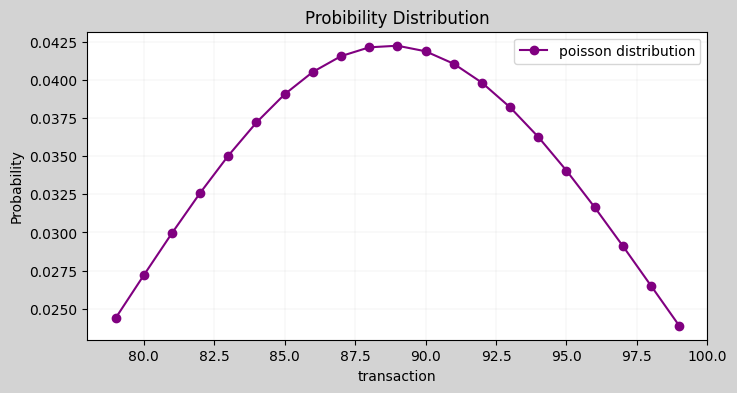

In [84]:
plt.figure(figsize=(8,4),facecolor='lightgrey')

plt.plot(k,probabilities,marker='o', color='purple',label='poisson distribution')
plt.title("Probibility Distribution")
plt.xlabel('transaction')
plt.ylabel('Probability')
plt.grid(linewidth=0.1)
plt.legend()